In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X,y= mnist['data'],mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

some_digit= X[36000]
some_digit_image= some_digit.reshape(28,28)

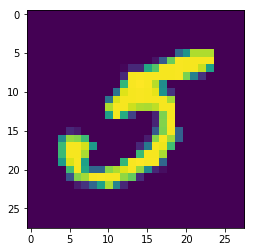

In [7]:
plt.imshow(some_digit_image)

In [8]:
y[36000]

5.0

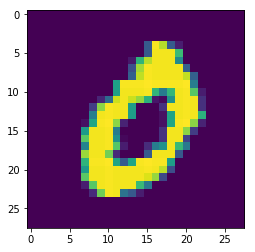

In [24]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
X_train,X_test= X_train/255, X_test/255
plt.imshow(X_train[3].reshape(28,28))


In [10]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [11]:

#index_train=np.logical_or(y_train==9 , y_train==8)
#index_test= np.logical_or(y_test==8 , y_test==8)
#X_train,X_test,y_train,y_test= X_train[index_train],X_test[index_test],y_train[index_train],y_test[index_test]

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate,cross_val_score,cross_val_predict

In [13]:
#lda = LinearDiscriminantAnalysis(n_components=2,solver='svd')
svc = LinearSVC()
#cross_val_score(lda,X_train,y_train,cv=5,scoring='accuracy')
cross_val_score(svc,X_train,y_train,cv=3,scoring='accuracy')

array([0.91176765, 0.90684534, 0.91348702])

In [14]:
y_train_predict=cross_val_predict(svc,X_train,y_train,cv=5)

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
conf_mx=confusion_matrix(y_train,y_train_predict)
conf_mx

array([[5748,    1,   21,   15,   10,   30,   42,    7,   42,    7],
       [   2, 6560,   40,   17,    8,   27,    8,   12,   59,    9],
       [  50,   61, 5320,   88,   67,   31,   75,   86,  157,   23],
       [  26,   35,  179, 5399,   14,  200,   22,   59,  127,   70],
       [  11,   27,   40,   10, 5418,   18,   42,   18,   53,  205],
       [  56,   27,   43,  191,   65, 4683,  119,   27,  138,   72],
       [  36,   16,   50,    4,   37,   88, 5641,    3,   39,    4],
       [  18,   25,   71,   16,   65,   13,    5, 5842,   21,  189],
       [  60,  148,   85,  158,   47,  189,   54,   25, 4965,  120],
       [  33,   24,   31,  106,  204,   47,    2,  226,   48, 5228]])

In [17]:
row_sum= conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx= conf_mx/row_sum
np.fill_diagonal(norm_conf_mx,0)

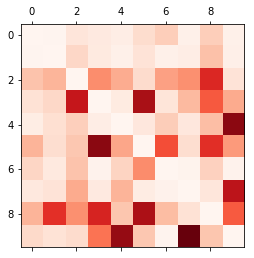

In [18]:
plt.matshow(norm_conf_mx,cmap= plt.cm.Reds)